In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Data Needed:
- Observed (Scatter Plot)
- True (Curve)
- Simulated (Curve) -> Solve ODE to get this
- $\alpha$ and $\beta$ values for each distance metric 

In [2]:
summary = pd.read_csv("dataframe/all_summary_statistics.csv")
summary.head()

,model,quantile,param,summary_statistic,Cramer-von Mises Distance,Energy Distance,Kullback-Leibler Divergence,Maximum Mean Discrepancy,Wasserstein Distance
0,n0.25_no_smoothing,5%,a,Mean,0.372448,1.084063,1.763882,1.937702,0.442505
1,n0.25_no_smoothing,5%,a,Median,0.368722,0.993652,1.636175,1.793402,0.346365
2,n0.25_no_smoothing,5%,a,StDev,1.213928,0.726098,1.095380,1.300305,0.586529
3,n0.25_no_smoothing,5%,a,Lower Bound,-1.277052,0.087351,-0.184579,0.145893,-0.702244
4,n0.25_no_smoothing,5%,a,Upper Bound,1.664937,2.667740,3.817911,4.275075,1.638634


In [3]:
# We want the posterior median (0.1% quantile, median)
relevantss = summary[(summary['quantile'] == "0.1%") & (summary["summary_statistic"] == "Median")].reset_index(drop=True)
relevantss

,model,quantile,param,summary_statistic,Cramer-von Mises Distance,Energy Distance,Kullback-Leibler Divergence,Maximum Mean Discrepancy,Wasserstein Distance
0,n0.25_no_smoothing,0.1%,a,Median,0.317941,0.924164,0.877295,0.923422,0.917275
1,n0.25_no_smoothing,0.1%,b,Median,2.873718,0.939164,0.854490,0.931151,0.949392
2,n0.25_smoothing,0.1%,a,Median,0.613641,0.910284,0.749632,0.897766,0.862380
3,n0.25_smoothing,0.1%,b,Median,1.562822,1.060764,0.973748,1.049428,1.074803
4,n0.5_no_smoothing,0.1%,a,Median,0.278493,1.060542,1.031221,1.063073,1.031428
5,n0.5_no_smoothing,0.1%,b,Median,3.028060,0.999107,0.873227,0.937027,1.006394
6,n0.5_smoothing,0.1%,a,Median,0.606495,0.965110,0.852159,0.958787,0.921750
7,n0.5_smoothing,0.1%,b,Median,2.601247,1.068184,1.161319,1.062278,1.076712
8,n0.75_no_smoothing,0.1%,a,Median,0.330620,1.007980,1.175377,1.083785,1.011055
9,n0.75_no_smoothing,0.1%,b,Median,3.735673,0.875226,0.866145,0.848655,0.894523


# Start with $\varepsilon\sim N(0, 0.25^2)$

First one to have smoothing and no smoothing

In [23]:
distances = ["Cramer-von Mises Distance", "Energy Distance", "Kullback-Leibler Divergence", "Maximum Mean Discrepancy", "Wasserstein Distance"]
true_curve = np.load("observed_data/n0_no_smoothing/n0_no_smoothing.npy")
t = np.linspace(0, 10, 100)

In [4]:
current_no_smoothing = relevantss[relevantss["model"] == "n0.25_no_smoothing"].reset_index(drop=True)
current_smoothing = relevantss[relevantss["model"] == "n0.25_smoothing"].reset_index(drop=True)
current_smoothing

,model,quantile,param,summary_statistic,Cramer-von Mises Distance,Energy Distance,Kullback-Leibler Divergence,Maximum Mean Discrepancy,Wasserstein Distance
0,n0.25_smoothing,0.1%,a,Median,0.613641,0.910284,0.749632,0.897766,0.862380
1,n0.25_smoothing,0.1%,b,Median,1.562822,1.060764,0.973748,1.049428,1.074803


In [17]:
# Observed Data
n025_no_smoothing_observed = np.load("observed_data/n0.25_no_smoothing/n0.25_no_smoothing.npy")
n025_smoothing_observed = np.load("observed_data/n0.25_smoothing/n0.25_smoothing.npy")

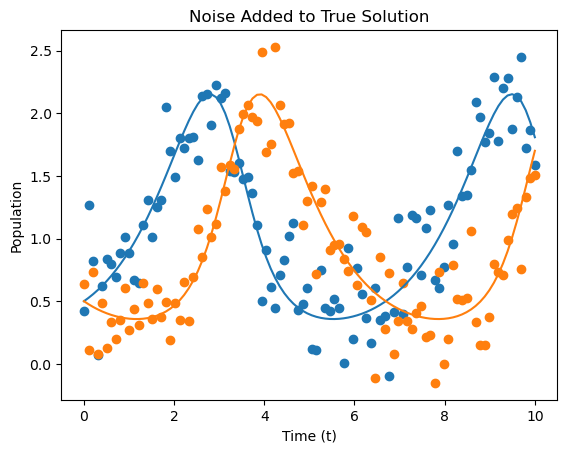

In [19]:
plt.scatter(t, n025_no_smoothing_observed[:,0], label="Prey w/Noise")
plt.scatter(t, n025_no_smoothing_observed[:,1], label="Predator w/Noise")
plt.plot(t, true_curve[:,0], label="True Prey")
plt.plot(t, true_curve[:,1], label="True Predator")
plt.xlabel("Time (t)")
plt.ylabel("Population")
plt.title("Noise Added to True Solution")
plt.show()

In [32]:
def dUdt(U, t, a, b):
    x, y = U

    return [a*x - x*y, b*x*y - y]

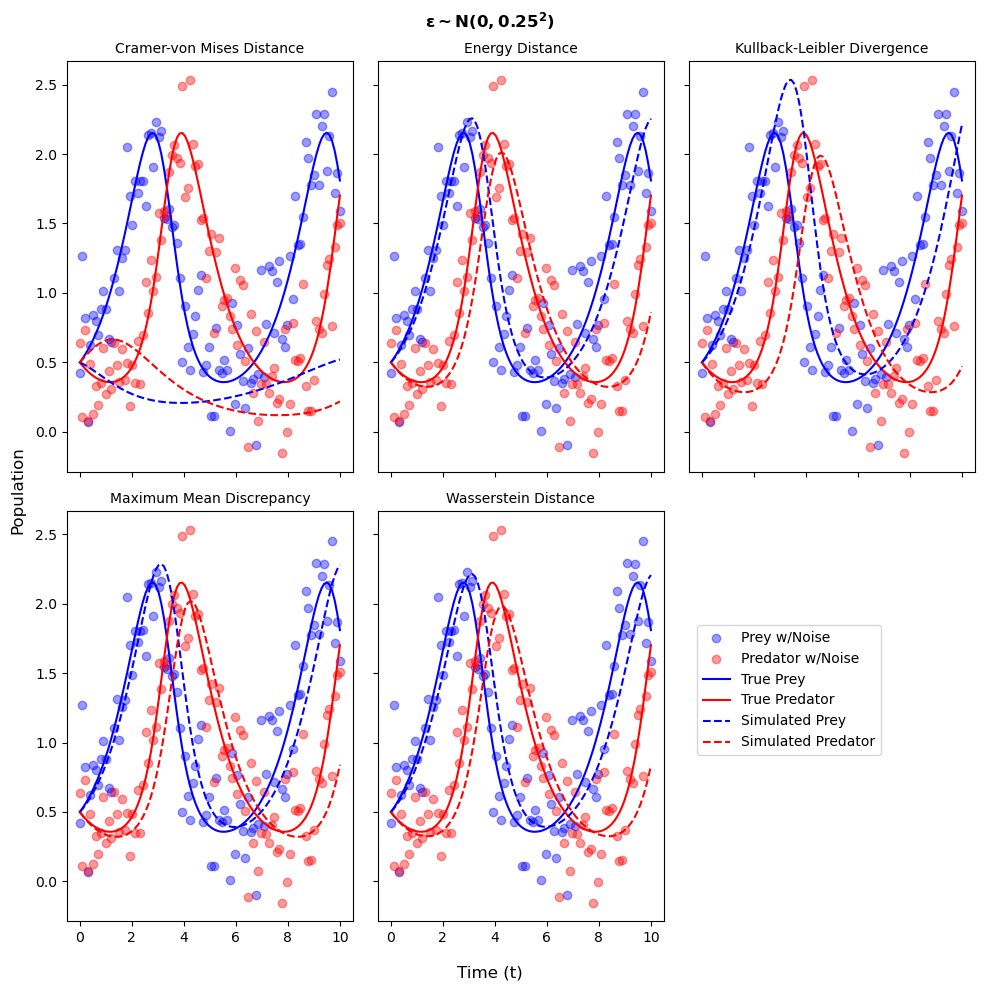

In [66]:
# Getting a list of alpha and beta values #
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 10))
axes[1, 2].axis("off")
ax = axes.flatten()

for i, metric in enumerate(distances):
    params = current_no_smoothing[metric]
    alpha = params[0]
    beta = params[1]
    S0 = (0.5, 0.5) # Initial Conditions
    sol = odeint(dUdt, S0, t, args=(alpha, beta)) # Solving the ODEs
    ax[i].scatter(t, n025_no_smoothing_observed[:,0], c="blue", label="Prey w/Noise", alpha=0.4)
    ax[i].scatter(t, n025_no_smoothing_observed[:,1], c="red", label="Predator w/Noise", alpha=0.4)
    ax[i].plot(t, true_curve[:,0], c="blue", label="True Prey")
    ax[i].plot(t, true_curve[:,1], c="red", label="True Predator")
    ax[i].set_title(metric, fontsize=10)
    ax[i].plot(t, sol[:,0], c="blue", linestyle = "--", label="Simulated Prey")
    ax[i].plot(t, sol[:,1], c="red", linestyle = "--", label="Simulated Predator")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.7, 0.3))
fig.suptitle(r"$\mathbf{\varepsilon\sim N(0, 0.25^2)}$")
fig.supxlabel("Time (t)", fontsize=12)
fig.supylabel("Population", fontsize=12)
fig.tight_layout()
plt.show()

In [28]:
np.full(1, 0.5)

array([0.5])